# 统计分析基础

## 一元线性回归

利用RealEstate数据集价格（Price）和房屋大小（Size）两列数据，将Price作为因变量，Size作为自变量，构建两者的一元线性回归模型，并预测房屋大小为2000，4000和8000的房屋的价格。

In [1]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [2]:
real_estate <- read_csv('../Data/real-estate.csv')

Parsed with column specification:
cols(
  MLS = col_integer(),
  Location = col_character(),
  Price = col_integer(),
  Bedrooms = col_integer(),
  Bathrooms = col_integer(),
  Size = col_integer(),
  `Price/SQ.Ft` = col_double(),
  Status = col_character()
)


In [3]:
real_estate_lm_model <- lm(Price ~ Size, data=real_estate)

In [4]:
summary(real_estate_lm_model)


Call:
lm(formula = Price ~ Size, data = real_estate)

Residuals:
     Min       1Q   Median       3Q      Max 
-1367770  -105060   -32223    56226  4180077 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -113509.8    22078.2  -5.141 3.45e-07 ***
Size            283.1       11.4  24.833  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 260900 on 779 degrees of freedom
Multiple R-squared:  0.4419,	Adjusted R-squared:  0.4411 
F-statistic: 616.7 on 1 and 779 DF,  p-value: < 2.2e-16


In [5]:
coef(real_estate_lm_model) %>% print

 (Intercept)         Size 
-113509.7517     283.0896 


In [6]:
confint(real_estate_lm_model) %>% print

                   2.5 %     97.5 %
(Intercept) -156849.6683 -70169.835
Size            260.7121    305.467


In [7]:
AIC(real_estate_lm_model) %>% print

[1] 21701.65


In [8]:
BIC(real_estate_lm_model) %>% print

[1] 21715.64



	Shapiro-Wilk normality test

data:  real_estate_lm_model_residuals
W = 0.63602, p-value < 2.2e-16


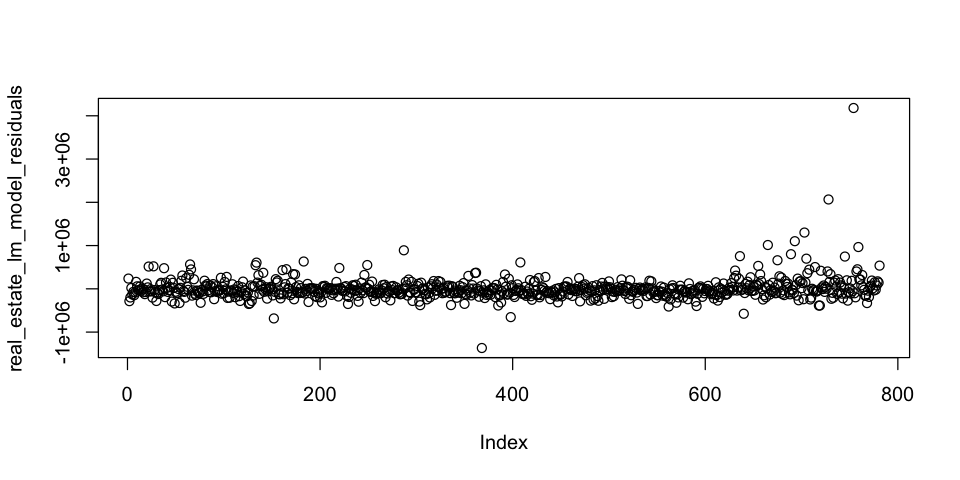

In [9]:
real_estate_lm_model_residuals <- residuals(real_estate_lm_model)
shapiro.test(real_estate_lm_model_residuals)
options(repr.plot.width=8, repr.plot.height=4)
plot(real_estate_lm_model_residuals)

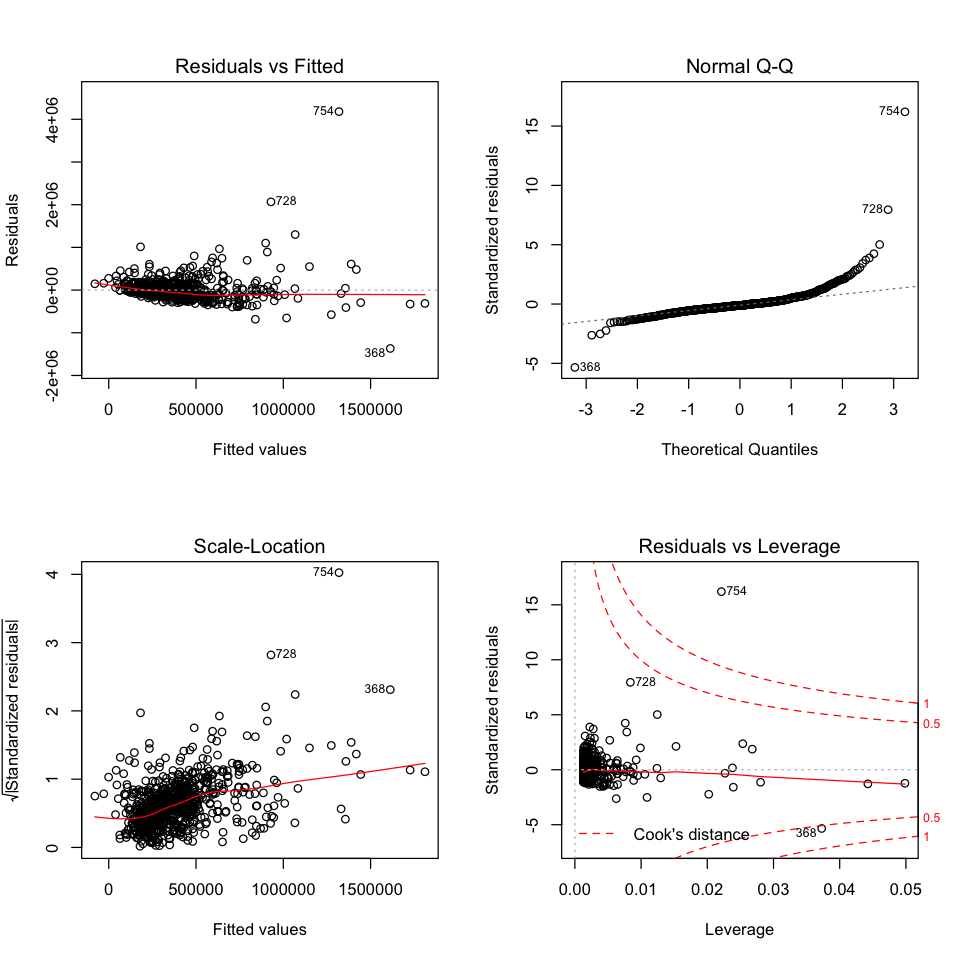

In [10]:
par(mfrow = c(2, 2))
options(repr.plot.width=8, repr.plot.height=8)
plot(real_estate_lm_model)

In [11]:
test_size = tibble(
    Size = c(2000, 4000, 8000)
)
test_price <- predict(real_estate_lm_model, test_size)
print(test_price)

        1         2         3 
 452669.4 1018848.5 2151206.8 


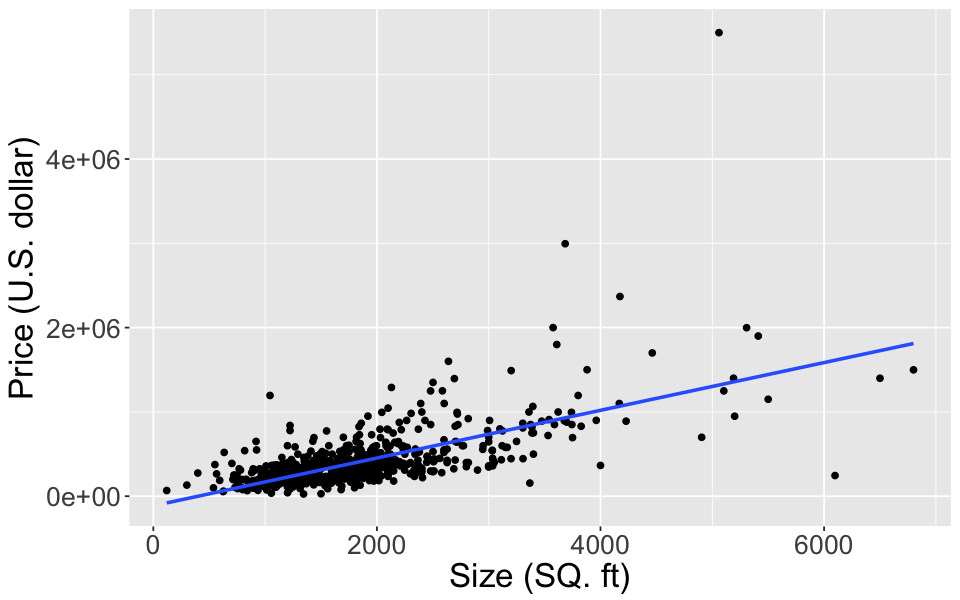

In [12]:
options(repr.plot.width=8, repr.plot.height=5)
p <- ggplot(real_estate, aes(Size, Price)) +
    xlab('Size (SQ. ft)') +
    ylab('Price (U.S. dollar)') +
    geom_point(color='black') +
    geom_smooth(method='lm', se=F) +
    theme(text=element_text(size=20))
print(p)

## 多元线性回归

利用RealEstate数据集价格（Price）和房屋大小（Size）两列数据，将Price作为因变量，构建合适的模型。

In [13]:
glimpse(real_estate)

Observations: 781
Variables: 8
$ MLS           <int> 132842, 134364, 135141, 135712, 136282, 136431, 13703...
$ Location      <chr> "Arroyo Grande", "Paso Robles", "Paso Robles", "Morro...
$ Price         <int> 795000, 399000, 545000, 909000, 109900, 324900, 19290...
$ Bedrooms      <int> 3, 4, 4, 4, 3, 3, 4, 3, 4, 3, 3, 3, 2, 3, 3, 4, 4, 3,...
$ Bathrooms     <int> 3, 3, 3, 4, 1, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3,...
$ Size          <int> 2371, 2818, 3032, 3540, 1249, 1800, 1603, 1450, 3360,...
$ `Price/SQ.Ft` <dbl> 335.30, 141.59, 179.75, 256.78, 87.99, 180.50, 120.34...
$ Status        <chr> "Short Sale", "Short Sale", "Short Sale", "Short Sale...


In [14]:
library(caret)
train_index <- createDataPartition(real_estate$Price, p=0.7, list=F)
real_estate_train <- real_estate[train_index, ]
real_estate_test <- real_estate[-train_index, ]

Loading required package: lattice
Warning message in as.POSIXlt.POSIXct(Sys.time()):
“unknown timezone 'default/Asia/Shanghai'”
Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



In [15]:
real_estate_lm_model_1 <- lm(Price ~ Size, data=real_estate_train)
summary(real_estate_lm_model_1)


Call:
lm(formula = Price ~ Size, data = real_estate_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-666857 -102910  -32121   57346 4211995 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -101348.77   26400.64  -3.839 0.000138 ***
Size            274.38      13.72  20.003  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 260800 on 547 degrees of freedom
Multiple R-squared:  0.4225,	Adjusted R-squared:  0.4214 
F-statistic: 400.1 on 1 and 547 DF,  p-value: < 2.2e-16


In [16]:
real_estate_lm_model_2 <- lm(Price ~ Bedrooms + Bathrooms + Size,
                          data=real_estate_train)
summary(real_estate_lm_model_2)


Call:
lm(formula = Price ~ Bedrooms + Bathrooms + Size, data = real_estate_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-691785 -109754  -20549   67181 4069157 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  121371.92   41492.79   2.925  0.00359 ** 
Bedrooms    -119641.32   16157.42  -7.405 5.02e-13 ***
Bathrooms     27433.00   19804.86   1.385  0.16657    
Size            326.06      21.15  15.413  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 248900 on 545 degrees of freedom
Multiple R-squared:  0.4758,	Adjusted R-squared:  0.4729 
F-statistic: 164.9 on 3 and 545 DF,  p-value: < 2.2e-16


In [17]:
real_estate_lm_model_1_predicted <- predict(real_estate_lm_model_1, real_estate_test)
real_estate_lm_model_2_predicted <- predict(real_estate_lm_model_2, real_estate_test)

计算预测误差：

$$\text{MAPE} = \sum_{i=1}^{n}{\left|\dfrac{y_i - \hat{y}_i}{y_i}\right|}$$

In [18]:
library(MLmetrics)
real_estate_lm_model_1_mape <- MAPE(real_estate_test$Price, real_estate_lm_model_1_predicted)
real_estate_lm_model_2_mape <- MAPE(real_estate_test$Price, real_estate_lm_model_2_predicted)
print(c(real_estate_lm_model_1_mape, real_estate_lm_model_2_mape))


Attaching package: ‘MLmetrics’

The following objects are masked from ‘package:caret’:

    MAE, RMSE

The following object is masked from ‘package:base’:

    Recall



[1] 0.5308392 0.3857338


## 案例分析

许多研究表明，全球平均气温在过去几十年中有所升高，以此引起的海平面上升和极端天气频现将会影响无数人，本讲案例就试图研究全球平均气温与一些其它因素的关系。如下是一份1983年到2008年的天气数据，具体字段的含义如下：

- Year: 年
- Month: 月
- Temp: 平均全球气温与参考值之间的差值。
- CO2, N2O, CH4, CFC.11, CFC.12: 二氧化碳,一氧化二氮、甲烷、氯氟化碳气体的浓度。
- Aerosols: 平均平流层气溶胶光学深度。
- TSI: 总太阳辐照度。
- MEI: 多变量厄尔尼诺南方振荡指数。

### 构建第1个模型

首先，我们假设除了年和月以外，其他的所有变量均和气温如平均气温的差值相关：

$$\text{Temp} \sim . - \text{Year} -\text{Month}$$

In [19]:
climate_change <- read_csv('../Data/climate_change.csv', col_names=T)

Parsed with column specification:
cols(
  Year = col_integer(),
  Month = col_integer(),
  MEI = col_double(),
  CO2 = col_double(),
  CH4 = col_double(),
  N2O = col_double(),
  `CFC-11` = col_double(),
  `CFC-12` = col_double(),
  TSI = col_double(),
  Aerosols = col_double(),
  Temp = col_double()
)


In [20]:
train_index <- createDataPartition(climate_change$Temp, p=0.7, list=F)
climate_change_train <- climate_change[train_index, ]
climate_change_test <- climate_change[-train_index, ]

In [21]:
climate_change_lm_modle_1 <- lm(Temp ~ . -Year -Month, data=climate_change_train)
summary(climate_change_lm_modle_1)


Call:
lm(formula = Temp ~ . - Year - Month, data = climate_change_train)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.248291 -0.060588 -0.000386  0.056167  0.302032 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.289e+02  2.248e+01  -5.733 3.44e-08 ***
MEI          6.757e-02  7.058e-03   9.574  < 2e-16 ***
CO2          5.165e-03  2.465e-03   2.095 0.037349 *  
CH4          1.060e-03  5.553e-04   1.909 0.057655 .  
N2O         -1.391e-02  8.640e-03  -1.610 0.108954    
`CFC-11`    -6.362e-03  1.689e-03  -3.768 0.000215 ***
`CFC-12`     3.010e-03  1.003e-03   3.001 0.003022 ** 
TSI          9.508e-02  1.635e-02   5.815 2.26e-08 ***
Aerosols    -1.585e+00  2.229e-01  -7.108 1.85e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08699 on 208 degrees of freedom
Multiple R-squared:  0.7703,	Adjusted R-squared:  0.7614 
F-statistic: 87.18 on 8 and 208 DF,  p-value: < 2.2e-16


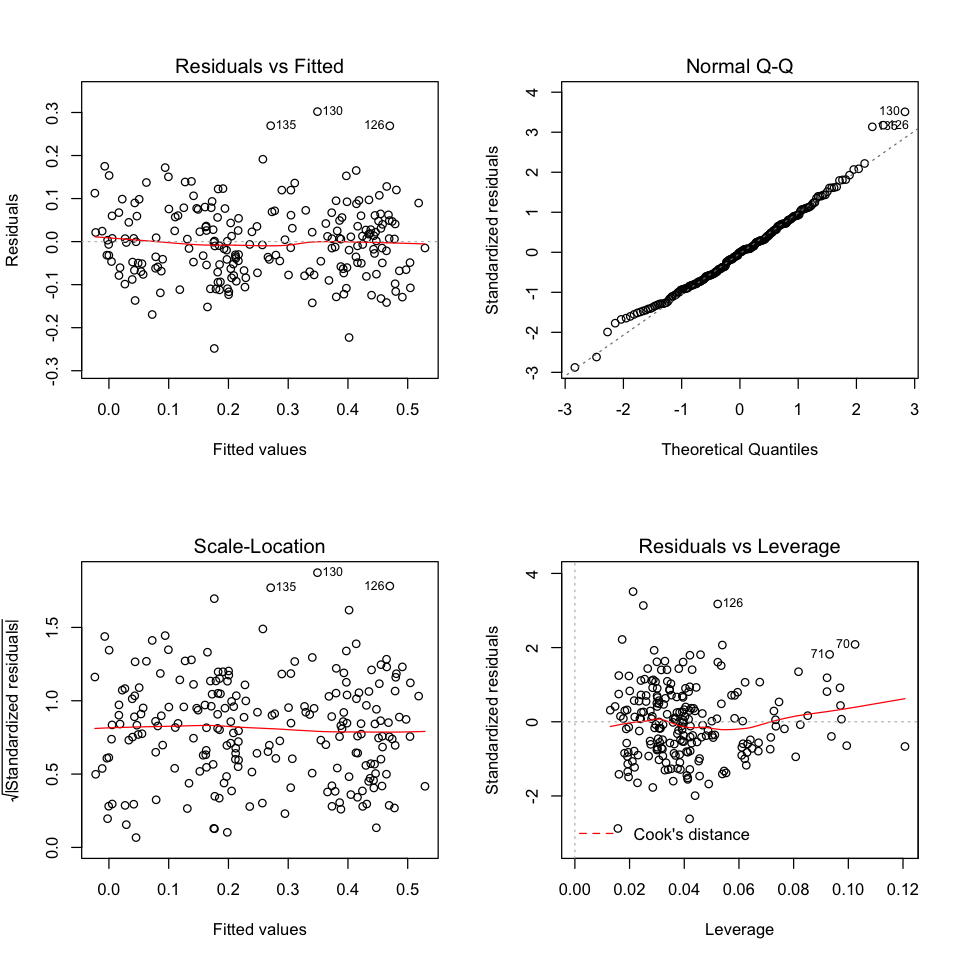

In [22]:
par(mfrow = c(2, 2))
options(repr.plot.width=8, repr.plot.height=8)
plot(climate_change_lm_modle_1)

In [23]:
climate_change_lm_model_1_predicted <- predict(climate_change_lm_modle_1, climate_change_test)
climate_change_lm_model_1_mae <- MAE(climate_change_test$Temp, climate_change_lm_model_1_predicted)
climate_change_lm_model_1_mape <- MAPE(climate_change_test$Temp, climate_change_lm_model_1_predicted)
print(c(climate_change_lm_model_1_mae, climate_change_lm_model_1_mape))

[1] 0.07823854 1.68316693


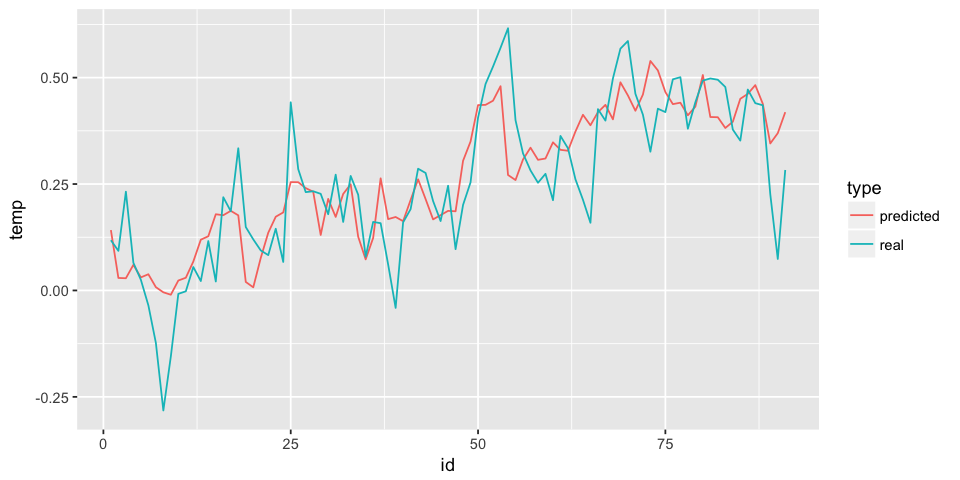

In [24]:
climate_change_test_predicted_real_compare <- tibble(
    id = seq(length(climate_change_lm_model_1_predicted)),
    predicted = climate_change_lm_model_1_predicted,
    real = climate_change_test$Temp
)
climate_change_test_predicted_real_compare <- climate_change_test_predicted_real_compare %>%
    gather(type, temp, -id)
options(repr.plot.width=8, repr.plot.height=4)
p <- ggplot(climate_change_test_predicted_real_compare, aes(id, temp)) +
    geom_path(aes(color=type))
print(p)

### 构建第2个模型

去掉相关性较强的变量，用剩余的变量构建新的模型：

In [25]:
climate_change_var_cor <- cor(climate_change_train)
options(width=200)
print(climate_change_var_cor)

                 Year        Month         MEI          CO2         CH4         N2O     CFC-11      CFC-12          TSI    Aerosols        Temp
Year      1.000000000  0.024293393 -0.15957902  0.985358352  0.90115665  0.99488083 0.43565412  0.86279129  0.006536971 -0.35757117  0.77129284
Month     0.024293393  1.000000000 -0.04664038 -0.044213375  0.08435421  0.06004925 0.06460953  0.07040288 -0.001677674 -0.01443745 -0.06431303
MEI      -0.159579020 -0.046640384  1.00000000 -0.169332922 -0.10464134 -0.17643280 0.10480410 -0.03877333 -0.019506310  0.37929572  0.11280313
CO2       0.985358352 -0.044213375 -0.16933292  1.000000000  0.85896388  0.98096551 0.36766388  0.81146906  0.005095761 -0.36738440  0.76773478
CH4       0.901156650  0.084354206 -0.10464134  0.858963875  1.00000000  0.88519394 0.71209681  0.95957721  0.135278192 -0.26478287  0.71100920
N2O       0.994880832  0.060049247 -0.17643280  0.980965511  0.88519394  1.00000000 0.38932536  0.83311509  0.024893884 -0.34726564  0.7


Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths



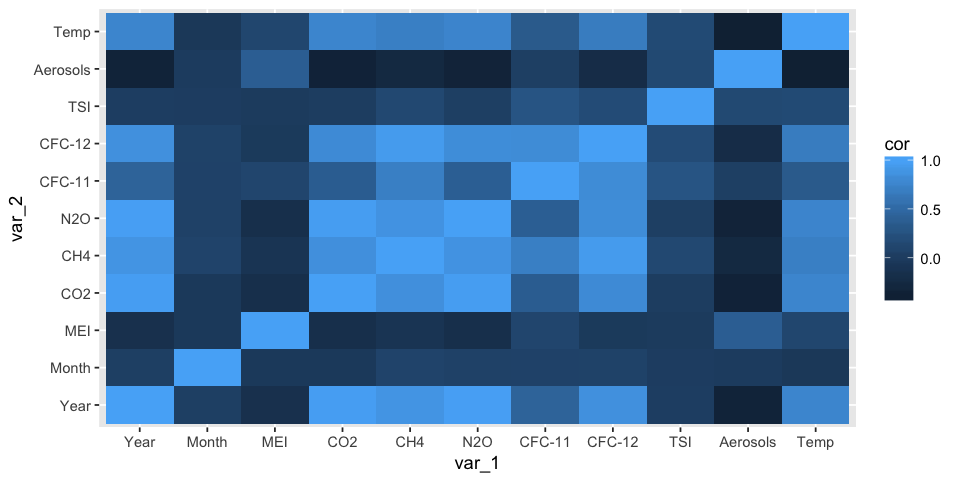

In [26]:
library(reshape2)
climate_change_var_cor_df <- melt(climate_change_var_cor, varnames=c('var_1', 'var_2'), value.name='cor')
p <- ggplot(climate_change_var_cor_df) +
    geom_tile(aes(var_1, var_2, fill=cor))
print(p)

In [27]:
climate_change_lm_modle_2 <- lm(Temp ~ MEI + TSI + Aerosols + N2O, data=climate_change_train)
summary(climate_change_lm_modle_2)


Call:
lm(formula = Temp ~ MEI + TSI + Aerosols + N2O, data = climate_change_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.24690 -0.05890 -0.00851  0.04767  0.32068 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.331e+02  2.223e+01  -5.990 8.90e-09 ***
MEI          6.972e-02  7.139e-03   9.766  < 2e-16 ***
TSI          9.221e-02  1.629e-02   5.660 4.87e-08 ***
Aerosols    -1.852e+00  2.237e-01  -8.276 1.41e-14 ***
N2O          2.381e-02  1.249e-03  19.066  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09055 on 212 degrees of freedom
Multiple R-squared:  0.7463,	Adjusted R-squared:  0.7415 
F-statistic: 155.9 on 4 and 212 DF,  p-value: < 2.2e-16


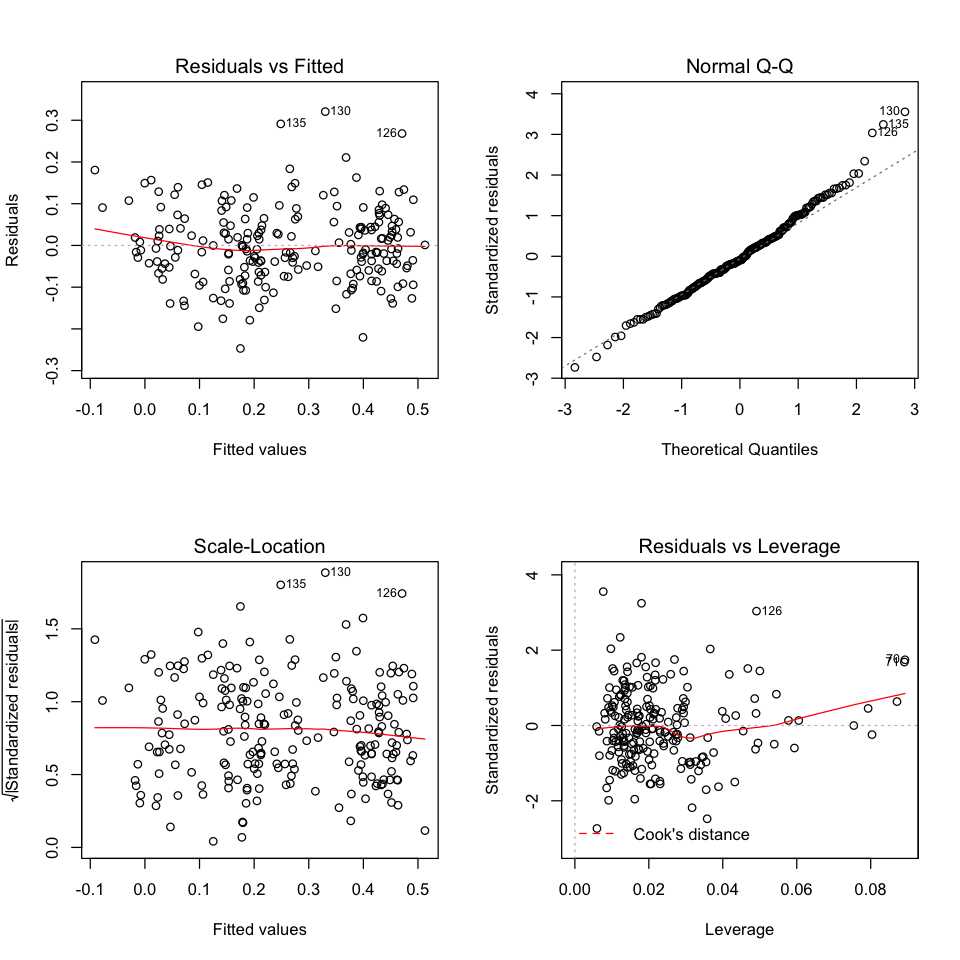

In [28]:
par(mfrow = c(2, 2))
options(repr.plot.width=8, repr.plot.height=8)
plot(climate_change_lm_modle_2)

In [29]:
climate_change_lm_model_2_predicted <- predict(climate_change_lm_modle_2, climate_change_test)
climate_change_lm_model_2_mae <- MAE(climate_change_test$Temp, climate_change_lm_model_2_predicted)
climate_change_lm_model_2_mape <- MAPE(climate_change_test$Temp, climate_change_lm_model_2_predicted)
print(c(climate_change_lm_model_2_mae, climate_change_lm_model_2_mape))

[1] 0.08172086 2.52974591


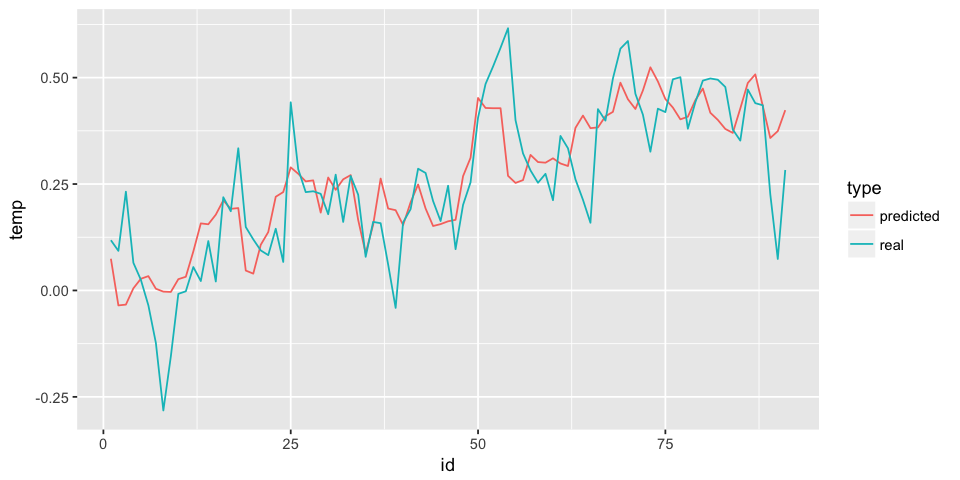

In [30]:
climate_change_test_predicted_real_compare <- tibble(
    id = seq(length(climate_change_lm_model_2_predicted)),
    predicted = climate_change_lm_model_2_predicted,
    real = climate_change_test$Temp
)
climate_change_test_predicted_real_compare <- climate_change_test_predicted_real_compare %>%
    gather(type, temp, -id)
options(repr.plot.width=8, repr.plot.height=4)
p <- ggplot(climate_change_test_predicted_real_compare, aes(id, temp)) +
    geom_path(aes(color=type))
print(p)

### 构建第3个模型

利用`step`函数选择变量构建新的模型：

In [31]:
climate_change_lm_modle_3 <- step(climate_change_lm_modle_1)